In [14]:
import matplotlib as plt
import pandas as pd
import openpyxl
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('Top-50-musicality-global.csv')
df.head()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


Danceability: Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0.0 является наименее танцевальным, а 1.0 - наиболее танцевальным.

Acousticness: Доверительный показатель от 0,0 до 1,0 того, является ли дорожка акустической. 1.0 означает высокую степень уверенности в том, что трек является акустическим.

Duration_ms: Продолжительность трека в миллисекундах.

Energy: Энергия измеряется в диапазоне от 0,0 до 1,0 и представляет собой перцептивную меру интенсивности и активности. Как правило, энергичные треки кажутся быстрыми, громкими и шумными.

Instrumentalness: определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в этом контексте рассматриваются как инструментальные. Рэп-треки или разговорные слова явно "вокальные".

Key: Ключ, в котором находится трек. Целые числа преобразуются в высоты тона с использованием стандартной нотации класса высоты тона. Например, 0 = C, 1 = C♯/D♭, 2 = D и так далее. Если ключ не был обнаружен, значение равно -1.

Liveness: Определяет присутствие аудитории в записи. Более высокие значения живости означают повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек находится в режиме реального времени.

Loudness: Общая громкость трека в децибелах (дБ). Значения громкости усредняются по всему треку и полезны для сравнения относительной громкости треков.

Mode: Режим указывает модальность (мажорную или минорную) трека, тип гаммы, из которой вытекает его мелодическое содержание. Мажор представлен цифрой 1, а минор равен 0.

Speechiness: Речевость определяет наличие произнесенных слов в треке. Чем более запись похожа исключительно на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1.0.

Tempo: Общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темп исполнения данного произведения, которая напрямую зависит от средней продолжительности такта.

Time_signature: Предполагаемая временная подпись. Временная сигнатура (метр) - это условное обозначение, указывающее, сколько ударов приходится на каждый такт (или меру). Временная сигнатура колеблется от 3 до 7, указывая временные сигнатуры от "3/4" до "7/4".

Valence: показатель от 0,0 до 1,0, описывающий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, жизнерадостные, эйфорические), в то время как треки с низкой валентностью звучат более негативно (например, грустные, депрессивные, сердитые).

In [3]:
df.columns

Index(['Unnamed: 0', 'Country', 'Track Name', 'Artist Name', 'Album Name',
       'Popularity', 'Date', 'Markets', 'Danceability', 'Acousticness',
       'duration', 'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       'Mode', 'Speechiness', 'Tempo', 'TSignature', 'Positiveness'],
      dtype='object')

In [4]:
df.isna().sum()

Unnamed: 0          0
Country             0
Track Name          6
Artist Name         6
Album Name          6
Popularity          0
Date                0
Markets             6
Danceability        0
Acousticness        0
duration            0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
TSignature          0
Positiveness        0
dtype: int64

In [5]:
df.shape

(3589, 21)

In [6]:
df[df.isna().any(axis=1)]

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
586,586,CHL,NaN,NaN,NaN,0,0000,NaN,0.716,0.0124,...,0.824,0.0,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
747,747,CRI,NaN,NaN,NaN,0,0000,NaN,0.716,0.0124,...,0.824,0.0,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
892,892,ECU,NaN,NaN,NaN,0,0000,NaN,0.716,0.0124,...,0.824,0.0,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
997,997,SLV,NaN,NaN,NaN,0,0000,NaN,0.716,0.0124,...,0.824,0.0,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
1069,1069,ESP,NaN,NaN,NaN,0,0000,NaN,0.716,0.0124,...,0.824,0.0,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
3524,3524,VEN,NaN,NaN,NaN,0,0000,NaN,0.730,0.0232,...,0.792,0.0,0,0.0699,-4.643,1,0.0517,90.019,4,0.533


In [7]:
df = df.dropna()

In [8]:
df.shape

(3583, 21)

In [9]:
df['Artist Name'].nunique()

1157

In [10]:
df.Country.nunique()

72

In [11]:
#df.to_excel('Top_50_Musicality_Global.xlsx', sheet_name='Data')

In [12]:
df.head()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


<Axes: >

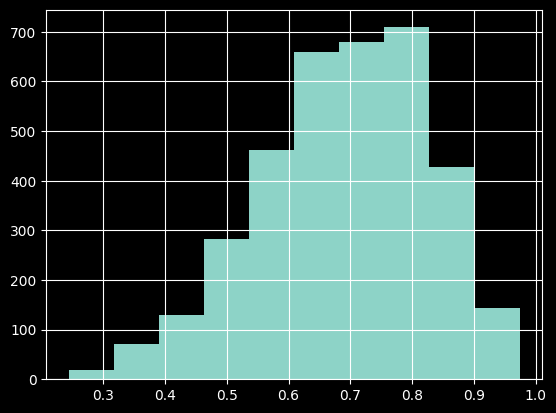

In [16]:
df['Danceability'].hist()

In [18]:
df.groupby('Markets')['Danceability'].agg(['mean', 'count'])

,mean,count
Markets,,
AD,0.706000,3
AE,0.731667,3
AR,0.688803,3527
AU,0.566000,3
CA,0.592000,29
CO,0.687000,1
CW,0.593000,1
IL,0.881000,1
IN,0.335000,1


In [26]:
df['Danceability_group'] = pd.cut(df['Danceability'], 5)

In [29]:
df.groupby('Danceability_group')['Popularity'].agg(['mean', 'count']).reset_index()

C:\Users\-USER-\AppData\Local\Temp\ipykernel_4216\294358778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Danceability_group')['Popularity'].agg(['mean', 'count']).reset_index()


,Danceability_group,mean,count
0,"(0.243, 0.39]",75.977778,90
1,"(0.39, 0.536]",79.917676,413
2,"(0.536, 0.682]",80.628011,1121
3,"(0.682, 0.828]",76.222382,1394
4,"(0.828, 0.974]",79.785841,565


In [34]:
table = df.pivot_table(index='Markets', values='Danceability', aggfunc=['count', 'mean']).reset_index()
table. columns = ['_'.join(col).strip() for col in table.columns.values]
table

,Markets_,count_Danceability,mean_Danceability
0,AD,3,0.706000
1,AE,3,0.731667
2,AR,3527,0.688803
3,AU,3,0.566000
4,CA,29,0.592000
5,CO,1,0.687000
6,CW,1,0.593000
7,IL,1,0.881000
8,IN,1,0.335000
9,US,14,0.723071
